In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [2]:
dataset=pd.read_csv("./g.csv",index_col="Date",parse_dates=True)

In [3]:
dataset.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  326.796783  334.409424  326.511505  333.038025  333.038025   
2012-01-04  332.847839  335.460449  330.640656  334.474487  334.474487   
2012-01-05  331.396393  332.317322  328.443451  329.834839  329.834839   
2012-01-06  329.904907  330.330322  325.220215  325.335327  325.335327   
2012-01-09  323.573578  323.823822  310.925934  311.541534  311.541534   

              Volume  
Date                  
2012-01-03   7345647  
2012-01-04   5722272  
2012-01-05   6559234  
2012-01-06   5380414  
2012-01-09  11633555

In [4]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


<AxesSubplot:xlabel='Date'>

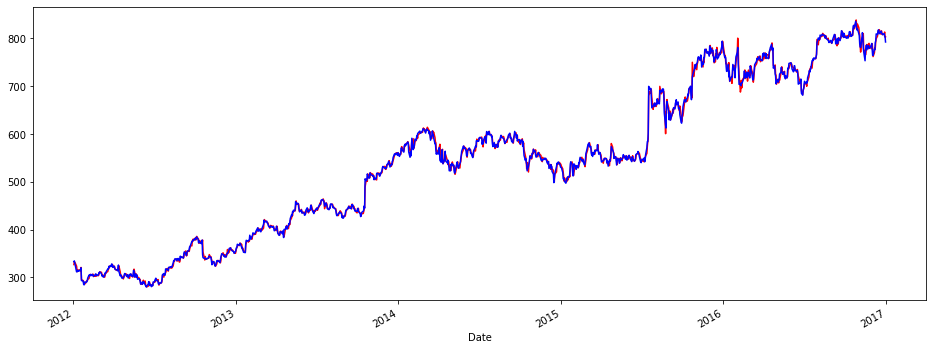

In [6]:
dataset["Open"].plot(figsize=(16,6),color='Red')
dataset["Close"].plot(figsize=(16,6),color='Blue')


In [7]:
dataset["Volume"].plot(figsize=(16,6),color='Green')

<AxesSubplot:xlabel='Date'>

In [8]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [9]:
dataset.rolling(7).mean().head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03         NaN         NaN         NaN         NaN         NaN   
2012-01-04         NaN         NaN         NaN         NaN         NaN   
2012-01-05         NaN         NaN         NaN         NaN         NaN   
2012-01-06         NaN         NaN         NaN         NaN         NaN   
2012-01-09         NaN         NaN         NaN         NaN         NaN   
2012-01-10         NaN         NaN         NaN         NaN         NaN   
2012-01-11  324.538823  326.938368  320.196629  322.771345  322.771345   
2012-01-12  322.985844  324.417271  318.346924  320.213789  320.213789   
2012-01-13  320.213789  321.321320  315.518380  317.118548  317.118548   
2012-01-17  318.058062  319.034031  313.334054  314.942801  314.942801   
2012-01-18  315.732880  317.175031  311.355647  313.719434  313.719434   
2012-01-19  315.338915  316.745318  312.087093  314.942801  314.942801   
2012-01-20  312.534681  313.685115  309.569576  312.286573  312.286573   
2012-01-23  309.853428  310.772919  306.855434  309.395107  309.395107   
2012-01-24  306.643075  307.540401  303.387678  305.912340  305.912340   
2012-01-25  303.157445  304.091239  299.478054  301.944087  301.944087   
2012-01-26  298.867440  299.979985  295.107252  297.619760  297.619760   
2012-01-27  294.874163  296.141859  291.332764  293.835262  293.835262   
2012-01-30  290.373945  291.781067  287.181471  289.410836  289.410836   
2012-01-31  289.835549  291.280566  286.713143  288.990413  288.990413   

                  Volume  
Date                      
2012-01-03           NaN  
2012-01-04           NaN  
2012-01-05           NaN  
2012-01-06           NaN  
2012-01-09           NaN  
2012-01-10           NaN  
2012-01-11  7.174104e+06  
2012-01-12  6.659962e+06  
2012-01-13  6.501064e+06  
2012-01-17  6.108999e+06  
2012-01-18  6.128637e+06  
2012-01-19  6.266413e+06  
2012-01-20  8.030561e+06  
2012-01-23  8.319672e+06  
2012-01-24  8.656649e+06  
2012-01-25  9.421712e+06  
2012-01-26  9.797593e+06  
2012-01-27  1.004186e+07  
2012-01-30  8.907341e+06  
2012-01-31  6.500065e+06

<AxesSubplot:xlabel='Date'>

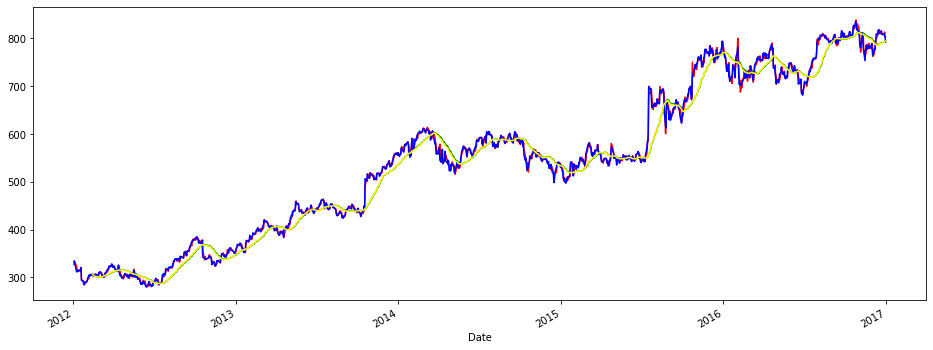

In [10]:
dataset['Open'].plot(figsize=(16,6),color="Red",label="Open")
dataset.rolling(window=30).mean()['Open'].plot(color="Green",label="Open Mean")
dataset['Close'].plot(figsize=(16,6),color="Blue",label="Close")
dataset.rolling(window=30).mean()['Close'].plot(color="yellow",label="Close Mean")

<AxesSubplot:xlabel='Date'>

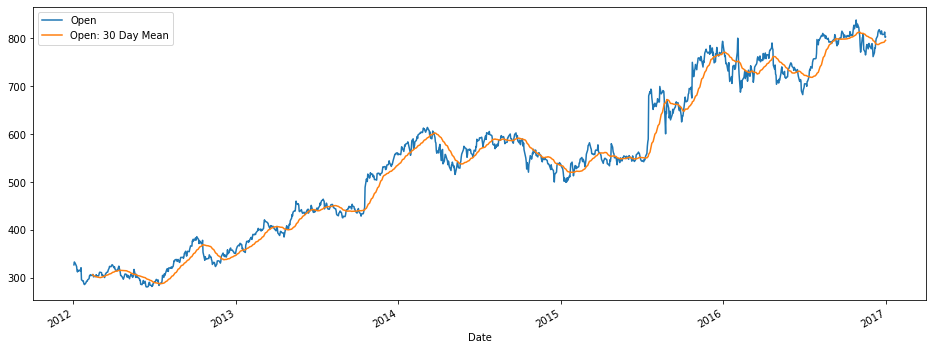

In [11]:
dataset['Open: 30 Day Mean']=dataset["Open"].rolling(window=30).mean()
dataset[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))

In [12]:
trainO=dataset['Open']
trainO=pd.DataFrame(trainO)

trainC=dataset['Close']
trainC=pd.DataFrame(trainO)

trainV=dataset['Volume']
trainV=pd.DataFrame(trainO)

In [13]:
dataset.isna().any()

Open                 False
High                 False
Low                  False
Close                False
Adj Close            False
Volume               False
Open: 30 Day Mean     True
dtype: bool

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
trainO_set_scaled=sc.fit_transform(trainO)
trainC_set_scaled=sc.fit_transform(trainC)
trainV_set_scaled=sc.fit_transform(trainV)

In [15]:
x_train=[]
y_train=[]
a=[]
b=[]
p=[]
q=[]
for i in range(60,1258):
    x_train.append(trainO_set_scaled[i-60:i,0])
    y_train.append(trainO_set_scaled[i,0])
    
    a.append(trainC_set_scaled[i-60:i,0])
    b.append(trainC_set_scaled[i,0])
    
    p.append(trainV_set_scaled[i-60:i,0])
    q.append(trainV_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

a, b=np.array(a),np.array(b)

a=np.reshape(a,(a.shape[0],a.shape[1],1))

p, q=np.array(p),np.array(q)

p=np.reshape(p,(p.shape[0],p.shape[1],1))

In [16]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [53]:
#regressor
r=Sequential()
r1=Sequential()
r2=Sequential()

In [54]:
r.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))

r.add(LSTM(units=50))

r.add(Dense(units=1))

In [55]:
r1.add(LSTM(units=50,return_sequences=True, input_shape = (a.shape[1],1)))
r1.add(LSTM(units=50))
r1.add(Dense(units=1))

In [56]:
r2.add(LSTM(units=50,return_sequences=True, input_shape = (p.shape[1],1)))
r2.add(LSTM(units=50))
r2.add(Dense(units=1))

In [73]:
r.compile(optimizer='adam', loss= 'mean_squared_error')
r.fit(x_train,y_train,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
1198/1198 - 22s - loss: 0.0010
Epoch 2/10
1198/1198 - 19s - loss: 7.2025e-04
Epoch 3/10
1198/1198 - 20s - loss: 5.4490e-04
Epoch 4/10
1198/1198 - 20s - loss: 5.1443e-04
Epoch 5/10
1198/1198 - 21s - loss: 5.5320e-04
Epoch 6/10
1198/1198 - 20s - loss: 4.8007e-04
Epoch 7/10
1198/1198 - 20s - loss: 4.9879e-04
Epoch 8/10
1198/1198 - 20s - loss: 4.5185e-04
Epoch 9/10
1198/1198 - 20s - loss: 4.6543e-04
Epoch 10/10
1198/1198 - 19s - loss: 4.9091e-04


In [74]:
r1.compile(optimizer='adam', loss= 'mean_squared_error')
r1.fit(a,b,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
1198/1198 - 27s - loss: 0.0011
Epoch 2/10
1198/1198 - 20s - loss: 7.9736e-04
Epoch 3/10
1198/1198 - 20s - loss: 5.6388e-04
Epoch 4/10
1198/1198 - 21s - loss: 6.0591e-04
Epoch 5/10
1198/1198 - 20s - loss: 4.7214e-04
Epoch 6/10
1198/1198 - 20s - loss: 5.3793e-04
Epoch 7/10
1198/1198 - 20s - loss: 4.4639e-04
Epoch 8/10
1198/1198 - 23s - loss: 4.9775e-04
Epoch 9/10
1198/1198 - 27s - loss: 4.6981e-04
Epoch 10/10
1198/1198 - 20s - loss: 3.9530e-04


In [75]:
r2.compile(optimizer='adam', loss= 'mean_squared_error')
r2.fit(p,q,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
1198/1198 - 24s - loss: 0.0014
Epoch 2/10
1198/1198 - 19s - loss: 7.9075e-04
Epoch 3/10
1198/1198 - 19s - loss: 5.7110e-04
Epoch 4/10
1198/1198 - 19s - loss: 5.8673e-04
Epoch 5/10
1198/1198 - 19s - loss: 6.4139e-04
Epoch 6/10
1198/1198 - 22s - loss: 4.5350e-04
Epoch 7/10
1198/1198 - 23s - loss: 4.8652e-04
Epoch 8/10
1198/1198 - 19s - loss: 4.4181e-04
Epoch 9/10
1198/1198 - 19s - loss: 4.3451e-04
Epoch 10/10
1198/1198 - 18s - loss: 4.8500e-04


In [76]:
test=pd.read_csv('./gogle.csv',index_col="Date",parse_dates=True)

In [77]:
real_stock=test.iloc[:,0:1].values
print(test.iloc[:,0:1])

real_stock1=test.iloc[:,3].values

real_stock2=test.iloc[:,5].values

                   Open
Date                   
2017-01-03   800.619995
2017-01-04   809.890015
2017-01-05   807.500000
2017-01-06   814.989990
2017-01-09   826.369995
...                 ...
2017-12-22  1070.000000
2017-12-26  1068.640015
2017-12-27  1066.599976
2017-12-28  1062.250000
2017-12-29  1055.489990

[251 rows x 1 columns]


In [78]:
test.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  800.619995  811.440002  796.890015  808.010010  808.010010   
2017-01-04  809.890015  813.429993  804.109985  807.770020  807.770020   
2017-01-05  807.500000  813.739990  805.919983  813.020020  813.020020   
2017-01-06  814.989990  828.960022  811.500000  825.210022  825.210022   
2017-01-09  826.369995  830.429993  821.619995  827.179993  827.179993   

             Volume  
Date                 
2017-01-03  1959000  
2017-01-04  1515300  
2017-01-05  1340500  
2017-01-06  2017100  
2017-01-09  1408900

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [80]:
test["Volume"]=test["Volume"].astype(float)

In [81]:
test_set=test['Open']
test_set=pd.DataFrame(test_set)

test_set1=test['Close']
test_set1=pd.DataFrame(test_set1)

test_set2=test['Volume']
test_set2=pd.DataFrame(test_set2)

In [82]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [83]:
dataset_total=pd.concat((dataset['Open'],test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


In [84]:
dataset_total1=pd.concat((dataset['Close'],test['Close']),axis=0)
inputs1=dataset_total1[len(dataset_total1)-len(test)-60:].values
inputs1=inputs1.reshape(-1,1)
inputs1=sc.transform(inputs1)
x_test1=[]

for i in range(60,inputs1.shape[0]):
    x_test1.append(inputs1[i-60:i,0])
x_test1 = np.array(x_test1)
x_test1 = np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
predicted_stock1=r.predict(x_test1)
predicted_stock1=sc.inverse_transform(predicted_stock1)


In [85]:
dataset_total2=pd.concat((dataset['Volume'],test['Volume']),axis=0)
inputs2=dataset_total2[len(dataset_total2)-len(test)-60:].values
inputs2=inputs2.reshape(-1,1)
inputs2=sc.transform(inputs2)
x_test2=[]

for i in range(60,inputs2.shape[0]):
    x_test2.append(inputs2[i-60:i,0])
x_test2 = np.array(x_test2)
x_test2 = np.reshape(x_test2,(x_test2.shape[0],x_test2.shape[1],1))
predicted_stock2=r.predict(x_test2)
predicted_stock2=sc.inverse_transform(predicted_stock2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

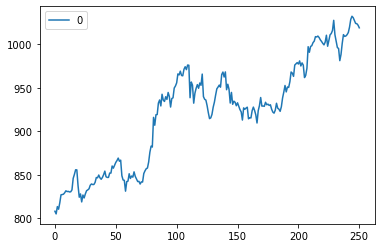

In [86]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()
predicted_stock.plot()

predicted_stock1 = pd.DataFrame(predicted_stock1)
predicted_stock1.info()
predicted_stock1.plot()


In [87]:
predicted_stock2 = pd.DataFrame(predicted_stock2)
predicted_stock2.info()
predicted_stock2.plot()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

In [88]:
plt.figure(figsize=(16,6))
plt.plot(real_stock,color='red', label='Real Google Stock Open price')
plt.plot(predicted_stock,color='pink', label="Predicted Google Stock Open Price")
plt.plot(real_stock1,color='black', label='Real Google Stock Close price')
plt.plot(predicted_stock1,color='blue', label="Predicted Google Stock Close Price")

plt.title("Google Stock Price prediction")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()